## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 4.6: Extinction curve modeled as Mie theory applied to a distribution of dust grain sizes

#### uses extcurve_s16.py and cubicspline.py from https://faun.rc.fas.harvard.edu/eschlafly/apored/extcurve.html
#### and miepython.py from https://pypi.org/project/miepython/

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import extcurve_s16

In [6]:
import sys
!{sys.executable} -m pip install miepython
import miepython as mp

extinction power law index = -1.64


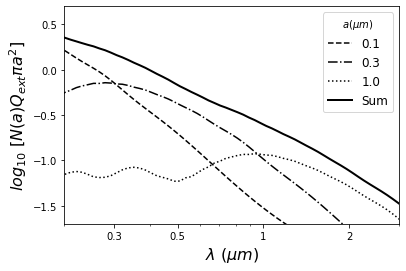

In [8]:
logwave = np.linspace(2.0,4.0,100)
wave = 10**logwave                 # nm

# grain size
#loga = np.linspace(-2,1,301)
#a = 10**loga                       # microns
a = np.array([0.1,0.3,1])           # microns
p = 3.5
#scale = [1,0.3333,0.1]
linestyle = ['k--','k-.','k:']

# index of refraction
# I find a very small imaginary part works best at matching extinction
# (somewhat smaller than literature determinations for the ISM: use this only for demonstration purposes)
m = 1.3 - 0.01j

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('$\lambda$ (nm)', fontsize=16)
ax1.set_xlabel('$\lambda\ (\mu m)$', fontsize=16)
ax1.set_ylabel("$log_{10}\  [N(a) Q_{ext} \pi a^2]$", fontsize=16)
#ax1.set_xlim(350,2500)
#ax1.set_xlim(200,3000)
ax1.set_xlim(0.2,3)
ax1.set_ylim(-1.7,0.7)

ax1.set_xscale('log')
#x_labels = ['300','500','1000','2000']#,'5000']
x_labels = ['0.3','0.5','1','2']#,'5000']
x_loc = np.array([float(x) for x in x_labels])
ax1.set_xticks(x_loc)
ax1.set_xticklabels(x_labels)

scale0 = 1.0
qtot = np.copy(wave)*0
for i,a1 in enumerate(a):
    scale = scale0 * (a1/0.1)**(2-p)
    x = 2*np.pi*a1/(wave/1000)
    qext, qsca, qback, g = mp.mie(m,x)
    qplot = scale * qext
    qtot += qplot
    plt.plot(wave/1000, np.log10(qplot), linestyle[i], label=str(a1))
plt.plot(wave/1000, np.log10(qtot), 'k-', lw=2, label='Sum')

#----------------------------------------
# calculate power law fit to extinction
oir = np.nonzero((wave > 500) & (wave < 3000))
a,b = np.polyfit(logwave[oir],np.log10(qtot[oir]),1)
print("extinction power law index = {0:4.2f}".format(a))
#----------------------------------------

ax1.legend(fontsize=12, title='$a (\mu m)$')
plt.savefig('mie_size_distribution.pdf')